In [2]:
import numpy as np
from sklearn.datasets import load_iris 
from sklearn.linear_model import Perceptron
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width 
y = (iris.target == 0).astype(np.int) # Iris setosa?
per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

In [3]:
import tensorflow as tf
from tensorflow import keras
tf.__version__, keras.__version__

('2.3.1', '2.4.0')

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

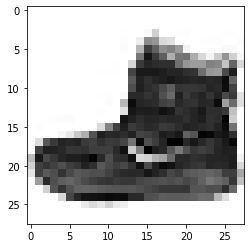

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train_full[0], cmap='Greys')

In [13]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_train[0].shape

(28, 28)

In [20]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [27]:
d = dict(zip(class_names, np.arange(len(class_names))))
d

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [38]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [39]:
model = keras.models.Sequential([ keras.layers.Flatten(input_shape=[28, 28]),
                                 keras.layers.Dense(300, activation="relu"),
                                 keras.layers.Dense(100, activation="relu"),
                                 keras.layers.Dense(10, activation="softmax")])

In [40]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.layers

In [42]:
hidden = model.layers[1]

In [43]:
hidden.name

'dense_9'

In [47]:
model.get_layer('dense_9')

In [49]:
weights, biases = hidden.get_weights()
weights, biases

(array([[ 0.06325665,  0.04930412,  0.04498298, ...,  0.01680926,
          0.06102946, -0.01515599],
        [-0.07330325, -0.06625023, -0.03115141, ..., -0.0650421 ,
          0.05585501,  0.03865632],
        [-0.0358261 ,  0.00929799,  0.02096441, ..., -0.07121293,
          0.00390845,  0.02510912],
        ...,
        [-0.01410369, -0.04696845, -0.01323918, ...,  0.05490254,
         -0.06086296,  0.04912889],
        [ 0.01110097,  0.00418211,  0.06592266, ..., -0.04195098,
         -0.05403174,  0.05434726],
        [-0.05875874,  0.00528944,  0.03158437, ...,  0.01185462,
          0.05109103,  0.06711343]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [50]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


In [51]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7327 - accuracy: 0.7571 - val_loss: 0.5054 - val_accuracy: 0.8366
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4938 - accuracy: 0.8285 - val_loss: 0.4536 - val_accuracy: 0.8466
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4484 - accuracy: 0.8436 - val_loss: 0.4319 - val_accuracy: 0.8528
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4204 - accuracy: 0.8535 - val_loss: 0.4169 - val_accuracy: 0.8562
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4000 - accuracy: 0.8592 - val_loss: 0.3991 - val_accuracy: 0.8604
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3853 - accuracy: 0.8646 - val_loss: 0.4097 - val_accuracy: 0.8516
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3716 - accuracy: 0.8678 - val_loss: 0.3810 - val_accuracy:

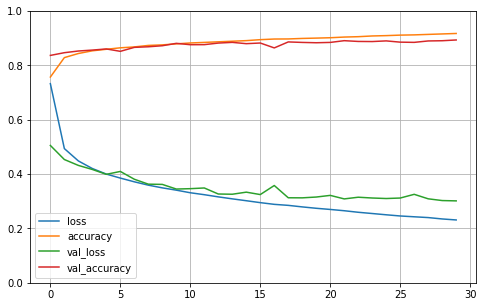

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [54]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 62.0368 - accuracy: 0.8509


[62.036842346191406, 0.8508999943733215]

In [55]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split( housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split( X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_valid = scaler.transform(X_valid) 
X_test = scaler.transform(X_test)

In [56]:
model = keras.models.Sequential([keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 989us/step - loss: 0.7419 - val_loss: 0.5774
Epoch 2/20
363/363 [==============================] - 0s 803us/step - loss: 0.5041 - val_loss: 0.5049
Epoch 3/20
363/363 [==============================] - 0s 857us/step - loss: 0.6034 - val_loss: 0.6459
Epoch 4/20
363/363 [==============================] - 0s 770us/step - loss: 0.4922 - val_loss: 0.5017
Epoch 5/20
363/363 [==============================] - 0s 780us/step - loss: 0.4570 - val_loss: 0.4785
Epoch 6/20
363/363 [==============================] - 0s 759us/step - loss: 0.4387 - val_loss: 0.4770
Epoch 7/20
363/363 [==============================] - 0s 854us/step - loss: 0.4348 - val_loss: 0.4627
Epoch 8/20
363/363 [==============================] - 0s 813us/step - loss: 0.4241 - val_loss: 0.4538
Epoch 9/20
363/363 [==============================] - 0s 792us/step - loss: 0.4156 - val_loss: 0.4474
Epoch 10/20
363/363 [==============================] - 0s 822us/step - loss: 0.412

In [57]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 593us/step - loss: 0.4007


In [62]:
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)
y_pred, y_test[:3]

(array([[1.110326 ],
        [2.5402265],
        [3.6845734]], dtype=float32),
 array([1.008, 2.19 , 3.257]))

In [67]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [68]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 30)           270         input_4[0][0]                    
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 30)           930         dense_22[0][0]                   
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 38)           0           input_4[0][0]                    
                                                                 dense_23[0][0]        

In [69]:
input_A = keras.layers.Input(shape=(5), name="wide_input")
input_B = keras.layers.Input(shape=(6), name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [70]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_26 (Dense)                (None, 30)           930         dense_25[0][0]                   
_______________________________________________________________________________________

In [71]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 2.0656 - val_loss: 0.8470
Epoch 2/20
363/363 [==============================] - 0s 965us/step - loss: 0.7136 - val_loss: 0.7152
Epoch 3/20
363/363 [==============================] - 0s 940us/step - loss: 0.6289 - val_loss: 0.6699
Epoch 4/20
363/363 [==============================] - 0s 927us/step - loss: 0.5946 - val_loss: 0.6397
Epoch 5/20
363/363 [==============================] - 0s 881us/step - loss: 0.5702 - val_loss: 0.6156
Epoch 6/20
363/363 [==============================] - 0s 877us/step - loss: 0.5508 - val_loss: 0.5950
Epoch 7/20
363/363 [==============================] - 0s 879us/step - loss: 0.5357 - val_loss: 0.5789
Epoch 8/20
363/363 [==============================] - 0s 953us/step - loss: 0.5242 - val_loss: 0.5664
Epoch 9/20
363/363 [==============================] - 0s 888us/step - loss: 0.5149 - val_loss: 0.5552
Epoch 10/20
363/363 [==============================] - 0s 890us/step - loss: 0.5070 

In [73]:
input_A = keras.layers.Input(shape=(5), name="wide_input")
input_B = keras.layers.Input(shape=(6), name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [74]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_27 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 30)           930         dense_27[0][0]                   
_______________________________________________________________________________________

In [75]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [76]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.9703 - main_output_loss: 0.8940 - aux_output_loss: 1.6571 - val_loss: 0.6497 - val_main_output_loss: 0.5907 - val_aux_output_loss: 1.1809
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5675 - main_output_loss: 0.5203 - aux_output_loss: 0.9921 - val_loss: 0.5695 - val_main_output_loss: 0.5243 - val_aux_output_loss: 0.9770
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5223 - main_output_loss: 0.4863 - aux_output_loss: 0.8471 - val_loss: 0.7962 - val_main_output_loss: 0.7754 - val_aux_output_loss: 0.9838
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5106 - main_output_loss: 0.4814 - aux_output_loss: 0.7733 - val_loss: 0.5146 - val_main_output_loss: 0.4856 - val_aux_output_loss: 0.7755
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6431 - main_output_loss: 0.6268 - aux_output_loss: 0.7902 - val_loss

In [78]:
total_loss, main_loss, aux_loss = model.evaluate( [X_test_A, X_test_B], [y_test, y_test])
total_loss, main_loss, aux_loss

162/162 [==============================] - 0s 784us/step - loss: 0.3952 - main_output_loss: 0.3836 - aux_output_loss: 0.4996


(0.39519599080085754, 0.3836006224155426, 0.4995548129081726)

In [80]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
y_pred_main, y_pred_aux

(array([[1.2887013],
        [2.9159725],
        [3.2446184]], dtype=float32),
 array([[1.5576848],
        [2.826283 ],
        [2.6450968]], dtype=float32))

In [81]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

In [83]:
model.compile(loss='mse', optimizer='SGD')
history =  model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                     validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.9444 - output_1_loss: 0.7171 - output_2_loss: 1.2273 - val_loss: 1.3072 - val_output_1_loss: 0.5524 - val_output_2_loss: 0.7548
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.2202 - output_1_loss: 0.4977 - output_2_loss: 0.7224 - val_loss: 1.1759 - val_output_1_loss: 0.4973 - val_output_2_loss: 0.6786
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 1.0821 - output_1_loss: 0.4642 - output_2_loss: 0.6179 - val_loss: 1.0782 - val_output_1_loss: 0.4676 - val_output_2_loss: 0.6106
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9984 - output_1_loss: 0.4336 - output_2_loss: 0.5648 - val_loss: 1.0045 - val_output_1_loss: 0.4448 - val_output_2_loss: 0.5597
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9407 - output_1_loss: 0.4066 - output_2_loss: 0.5341 - val_loss: 0.9629 - val_output_1_loss: 0.4271 - val_ou

In [84]:
model.save('my_first_ann.h5')

NotImplementedError: Saving the model to HDF5 format requires the model to be a Functional model or a Sequential model. It does not work for subclassed models, because such models are defined via the body of a Python method, which isn't safely serializable. Consider saving to the Tensorflow SavedModel format (by setting save_format="tf") or using `save_weights`.

In [85]:
input_A = keras.layers.Input(shape=(5), name="wide_input")
input_B = keras.layers.Input(shape=(6), name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
          validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8542 - main_output_loss: 0.7340 - aux_output_loss: 1.9364 - val_loss: 0.6297 - val_main_output_loss: 0.5692 - val_aux_output_loss: 1.1745
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6558 - main_output_loss: 0.6139 - aux_output_loss: 1.0331 - val_loss: 0.5495 - val_main_output_loss: 0.5059 - val_aux_output_loss: 0.9420
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6191 - main_output_loss: 0.5893 - aux_output_loss: 0.8869 - val_loss: 1.4415 - val_main_output_loss: 1.4491 - val_aux_output_loss: 1.3732
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5570 - main_output_loss: 0.5204 - aux_output_loss: 0.8871 - val_loss: 0.5254 - val_main_output_loss: 0.4959 - val_aux_output_loss: 0.7914
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5233 - main_output_loss: 0.4982 - aux_output_loss: 0.7489 - val_loss

In [86]:
model.save('my_first_ann.h5')

In [87]:
model = keras.models.load_model('my_first_ann.h5')

In [91]:
input_A = keras.layers.Input(shape=(5), name="wide_input")
input_B = keras.layers.Input(shape=(6), name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]), callbacks=[checkpoint_cb])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2857 - main_output_loss: 1.1515 - aux_output_loss: 2.4932 - val_loss: 0.6919 - val_main_output_loss: 0.6100 - val_aux_output_loss: 1.4288
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6074 - main_output_loss: 0.5429 - aux_output_loss: 1.1873 - val_loss: 0.5838 - val_main_output_loss: 0.5236 - val_aux_output_loss: 1.1251
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5451 - main_output_loss: 0.4952 - aux_output_loss: 0.9945 - val_loss: 0.5449 - val_main_output_loss: 0.4982 - val_aux_output_loss: 0.9654
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5053 - main_output_loss: 0.4654 - aux_output_loss: 0.8651 - val_loss: 0.5221 - val_main_output_loss: 0.4844 - val_aux_output_loss: 0.8611
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4868 - main_output_loss: 0.4540 - aux_output_loss: 0.7824 - val_loss

In [92]:
model = keras.models.load_model("my_keras_model.h5")

In [95]:
model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 712us/step - loss: 0.3877 - main_output_loss: 0.3739 - aux_output_loss: 0.5115


[0.3876643776893616, 0.3739095628261566, 0.5114568471908569]

In [96]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [97]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [99]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir(): 
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [100]:
run_logdir

'./my_logs/run_2020_12_01-14_44_52'

In [102]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
                    callbacks=[tensorboard_cb])

Epoch 1/20
  1/363 [..............................] - ETA: 0s - loss: 0.2753 - main_output_loss: 0.2540 - aux_output_loss: 0.4669WARNING:tensorflow:From /Users/Dipper/machine_learning/ml_env/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
363/363 [==============================] - 1s 2ms/step - loss: 0.3571 - main_output_loss: 0.3425 - aux_output_loss: 0.4892 - val_loss: 0.3845 - val_main_output_loss: 0.3708 - val_aux_output_loss: 0.5085
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3537 - main_output_loss: 0.3395 - aux_output_loss: 0.4808 - val_loss: 0.3806 - val_main_output_loss: 0.3667 - val_aux_output_loss: 0.5055
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3516 - main_output_loss: 0.3379 - aux_output_loss: 0.4752 - val_loss: 0.3

In [104]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

In [106]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
        model.add(keras.layers.Dense(1))
        optimizer = keras.optimizers.SGD(lr=learning_rate)
        model.compile(loss="mse", optimizer=optimizer)
    return model

In [107]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [108]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 1.2482 - val_loss: 0.7781
Epoch 2/100
363/363 [==============================] - 0s 771us/step - loss: 0.6628 - val_loss: 0.6699
Epoch 3/100
363/363 [==============================] - 0s 828us/step - loss: 0.5755 - val_loss: 0.6075
Epoch 4/100
363/363 [==============================] - 0s 847us/step - loss: 0.5315 - val_loss: 0.5719
Epoch 5/100
363/363 [==============================] - 0s 847us/step - loss: 0.5053 - val_loss: 0.5433
Epoch 6/100
363/363 [==============================] - 0s 836us/step - loss: 0.4882 - val_loss: 0.5250
Epoch 7/100
363/363 [==============================] - 0s 828us/step - loss: 0.4793 - val_loss: 0.5118
Epoch 8/100
363/363 [==============================] - 0s 832us/step - loss: 0.4694 - val_loss: 0.5013
Epoch 9/100
363/363 [==============================] - 0s 856us/step - loss: 0.4654 - val_loss: 0.4956
Epoch 10/100
363/363 [==============================] - 0s 833us/step - los

In [109]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {"n_hidden": [0, 1, 2, 3],
                  "n_neurons": np.arange(1, 100),
                  "learning_rate": reciprocal(3e-4, 3e-2)}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.1664 - val_loss: 0.7412
Epoch 2/100
242/242 [==============================] - 0s 914us/step - loss: 0.6242 - val_loss: 0.6439
Epoch 3/100
242/242 [==============================] - 0s 900us/step - loss: 0.5590 - val_loss: 0.5800
Epoch 4/100
242/242 [==============================] - 0s 955us/step - loss: 0.5132 - val_loss: 0.5406
Epoch 5/100
242/242 [==============================] - 0s 936us/step - loss: 0.4897 - val_loss: 0.5205
Epoch 6/100
242/242 [==============================] - 0s 930us/step - loss: 0.4745 - val_loss: 0.5064
Epoch 7/100
242/242 [==============================] - 0s 886us/step - loss: 0.4652 - val_loss: 0.4948
Epoch 8/100
242/242 [==============================] - 0s 903us/step - loss: 0.4599 - val_loss: 0.4886
Epoch 9/100
242/242 [==============================] - 0s 903us/step - loss: 0.4533 - val_loss: 0.4867
Epoch 10/100
242/242 [==============================] - 0s 910us/step - los

242/242 [==============================] - 0s 908us/step - loss: 0.3453 - val_loss: 0.3760
Epoch 81/100
242/242 [==============================] - 0s 934us/step - loss: 0.3425 - val_loss: 0.3794
Epoch 82/100
242/242 [==============================] - 0s 895us/step - loss: 0.3448 - val_loss: 0.4063
Epoch 83/100
242/242 [==============================] - 0s 929us/step - loss: 0.3419 - val_loss: 0.3720
Epoch 84/100
242/242 [==============================] - 0s 875us/step - loss: 0.3396 - val_loss: 0.3716
Epoch 85/100
242/242 [==============================] - 0s 879us/step - loss: 0.3392 - val_loss: 0.3715
Epoch 86/100
242/242 [==============================] - 0s 908us/step - loss: 0.4005 - val_loss: 0.3755
Epoch 87/100
242/242 [==============================] - 0s 944us/step - loss: 0.3462 - val_loss: 0.3700
Epoch 88/100
242/242 [==============================] - 0s 918us/step - loss: 0.3393 - val_loss: 0.3730
Epoch 89/100
242/242 [==============================] - 0s 903us/step - loss:

242/242 [==============================] - 0s 870us/step - loss: 0.3748 - val_loss: 0.4281
Epoch 37/100
242/242 [==============================] - 0s 861us/step - loss: 0.3754 - val_loss: 0.4243
Epoch 38/100
242/242 [==============================] - 0s 870us/step - loss: 0.3809 - val_loss: 0.5683
Epoch 39/100
242/242 [==============================] - 0s 854us/step - loss: 0.3930 - val_loss: 0.4216
Epoch 40/100
242/242 [==============================] - 0s 875us/step - loss: 0.3715 - val_loss: 0.4204
Epoch 41/100
242/242 [==============================] - 0s 865us/step - loss: 0.3736 - val_loss: 0.4204
Epoch 42/100
242/242 [==============================] - 0s 867us/step - loss: 0.3677 - val_loss: 0.4285
Epoch 43/100
242/242 [==============================] - 0s 870us/step - loss: 0.3699 - val_loss: 0.4436
Epoch 44/100
242/242 [==============================] - 0s 850us/step - loss: 0.3664 - val_loss: 0.4136
Epoch 45/100
242/242 [==============================] - 0s 870us/step - loss:

Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 18/100
242/242 [==============================] - 0s 990us/step - loss: nan - val_loss: nan
Epoch 19/100
121/121 [==============================] - 0s 620us/step - loss: nan
Epoch 1/100
201/242 [=======================>......] - ETA: 0s - loss: 0.9037

KeyboardInterrupt: 

In [15]:
keras.layers.Dense?

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [11]:
b = tf.constant([[1, 2, 3], [4,5,6]])

In [27]:
a = np.array([[1.,2.], [4.,5.]])

In [15]:
a@b

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 9, 12, 15],
       [24, 33, 42]], dtype=int32)>

In [18]:
tf.squeeze(b)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [19]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

In [20]:
def create_huber(threshold=1.0): 
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [28]:
c = np.array([[3.,4.], [6.,7.]])
create_huber()(a, c)

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1.5, 1.5],
       [1.5, 1.5]])>

In [32]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [33]:
c[0]

array([3., 4.])

In [36]:
def f(w1, w2):
    return 3*w1**2+2*w1*w2
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2)
gradients = tape.gradient(z, [w1, w2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [38]:
@tf.function
def tf_cube(x): 
    return x ** 3

In [39]:
tf_cube

In [5]:
tf.constant('sdhsjka')

<tf.Tensor: shape=(), dtype=string, numpy=b'sdhsjka'>

In [9]:
a = np.array([1,2,3,4])
a[-1]

4

In [10]:
[0.] * 8 + [tf.constant([], dtype=tf.float32)]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 <tf.Tensor: shape=(0,), dtype=float32, numpy=array([], dtype=float32)>]

In [11]:
import tensorflow as tf

In [15]:
from tensorflow import keras

In [18]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [25]:
import numpy as np
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt

In [53]:
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
images.shape

(2, 427, 640, 3)

In [51]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=2,
                           padding="SAME", activation="relu")


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



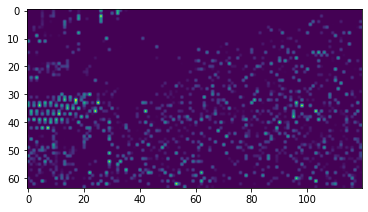

In [52]:
def crop(images):
    return images[150:220, 130:250]
outputs = conv(images)
plt.imshow(crop(outputs[0, :, :, 1]))

In [54]:
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            keras.layers.Conv2D(filters, 3, strides=strides, padding="same", use_bias=False),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.Conv2D(filters, 3, strides=1, padding="same", use_bias=False),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                keras.layers.Conv2D(filters, 1, strides=strides,padding="same", use_bias=False),
                keras.layers.BatchNormalization()]
    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [55]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, 7, strides=2, input_shape=[224, 224, 3],padding="same", use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same"))
prev_filters = 64
for filters in [64]*3 + [128]*4 + [256]*6 + [512]*3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 112, 112, 64)      9408      
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
residual_unit (ResidualUnit) (None, 56, 56, 64)        74240     
_________________________________________________________________
residual_unit_1 (ResidualUni (None, 56, 56, 64)        74240     
_________________________________________________________________
residual_unit_2 (ResidualUni (None, 56, 56, 64)       

In [57]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) # wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) # + noise
    return series[..., np.newaxis].astype(np.float32)

In [61]:
np.linspace(0, 1, 50) - np.random.rand(5, 1)

array([[-9.00643636e-01, -8.80235473e-01, -8.59827309e-01,
        -8.39419146e-01, -8.19010983e-01, -7.98602820e-01,
        -7.78194656e-01, -7.57786493e-01, -7.37378330e-01,
        -7.16970167e-01, -6.96562003e-01, -6.76153840e-01,
        -6.55745677e-01, -6.35337514e-01, -6.14929350e-01,
        -5.94521187e-01, -5.74113024e-01, -5.53704860e-01,
        -5.33296697e-01, -5.12888534e-01, -4.92480371e-01,
        -4.72072207e-01, -4.51664044e-01, -4.31255881e-01,
        -4.10847718e-01, -3.90439554e-01, -3.70031391e-01,
        -3.49623228e-01, -3.29215065e-01, -3.08806901e-01,
        -2.88398738e-01, -2.67990575e-01, -2.47582412e-01,
        -2.27174248e-01, -2.06766085e-01, -1.86357922e-01,
        -1.65949758e-01, -1.45541595e-01, -1.25133432e-01,
        -1.04725269e-01, -8.43171054e-02, -6.39089421e-02,
        -4.35007789e-02, -2.30926156e-02, -2.68445233e-03,
         1.77237109e-02,  3.81318742e-02,  5.85400375e-02,
         7.89482007e-02,  9.93563640e-02],
       [-2.85

In [63]:
a = np.array([[1,2,3], [4,5,6]])
a[:, np.newaxis, :]

array([[[1, 2, 3]],

       [[4, 5, 6]]])

In [69]:
a= [1,2,3]
b= [4,5,6]
zip(a, b)
for i, j in zip([1], [1,2,3]):
    print(i, j)

1 1


In [68]:
print(zip([1], [1,2,3]))

In [2]:
print(zip([1], [1,2,3]))